# 1 - Packages
First, let's run the cell below to import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
h5py is a common package to interact with a dataset that is stored on an H5 file.
matplotlib is a famous library to plot graphs in Python.
PIL and scipy are used here to test your model with your own picture at the end.

In [1]:
import numpy as np
import h5py as hp
import matplotlib.pyplot as plt
import PIL as pl
import scipy as sc

In [2]:
def load_dataset():
    train_dataset = hp.File('train_catvnoncat.h5', 'r')

    keys = list(train_dataset.keys()) #To know the keys of the training dataset. So that we can get the keys that are used for feature set and output set
    print(keys)
    
    train_set_x, train_set_y = np.array(train_dataset['train_set_x'][:]), np.array(train_dataset['train_set_y'][:])
    print("The dimensions of train_set_x with the np.array are: ", train_set_x.shape)

    test_dataset = hp.File('test_catvnoncat.h5', 'r')
    test_set_x, test_set_y = np.array(test_dataset['test_set_x'][:]), np.array(test_dataset['test_set_y'][:])
    classes = train_dataset['list_classes']

    train_set_y_orig = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y_orig = test_set_y.reshape((1, test_set_y.shape[0]))

    return train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(train_set_x_orig.shape)
print(train_set_y.shape)

['list_classes', 'train_set_x', 'train_set_y']
The dimensions of train_set_x with the np.array are:  (209, 64, 64, 3)
(209, 64, 64, 3)
(1, 209)


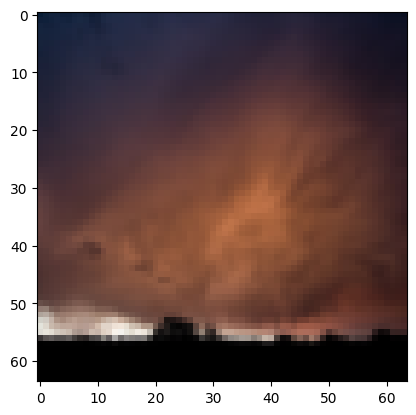

y = 0, it's a 'non-cat' picture.


In [4]:
# Example of a picture
index = 208
plt.imshow(train_set_x_orig[index])
plt.show()
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# train_set_x = train_set_x_orig.reshape(m_train, -1).T
# test_set_x = test_set_x_orig.reshape(m_test, -1).T
#Flatten the training data into a single vector with dimension 64 * 64 * 3
print("The dimensions of train_set_x_orig are ", train_set_x_orig.shape)
train_set_x_orig_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1] * train_set_x_orig.shape[2] * train_set_x_orig.shape[3], train_set_x_orig.shape[0])

#Similarly flatten the testing input data
test_set_x_orig_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3], test_set_x_orig.shape[0])

print ("train_set_x_flatten shape: " + str(train_set_x_orig_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_orig_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_orig_flatten[0:5,0]))

The dimensions of train_set_x_orig are  (209, 64, 64, 3)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [7]:
train_set_x = train_set_x_orig_flatten/255.
test_set_x = test_set_x_orig_flatten/255.

In [8]:
#Implementing sigmoid(helper function)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def initialising(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
print(initialising(209))

(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]

In [12]:
# Forward propogation
def propogate(w, b, X, Y):

    m = X.shape[1]
    
    # w, b = initialising(train_set_x_orig_flatten.shape[1])
    A = sigmoid(np.dot(w.T, X) + b)

    #Calculate the cost Function
    cost = -1 * np.sum(np.log(A)*Y + (1-Y)*np.log(1-A))/m

    dz = A - Y
    dw = (np.dot(X, (A-Y).T))/m
    db = np.sum(A-Y)/m

    #print("The dimensions of dz are ", dz.shape)
    #print(dw.shape)
    #print(db.shape)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    
    

In [13]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propogate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [14]:
#Optimising

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propogate(w, b, X, Y)

        #Retrieve dw and db from grads
        dw = grads["dw"]
        db = grads["db"]

        #New w and b grom the gradient descent derivaties
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        #Record Costs 
        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i%100 == 0:
            print("The cost at the %i th iteration is: %f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


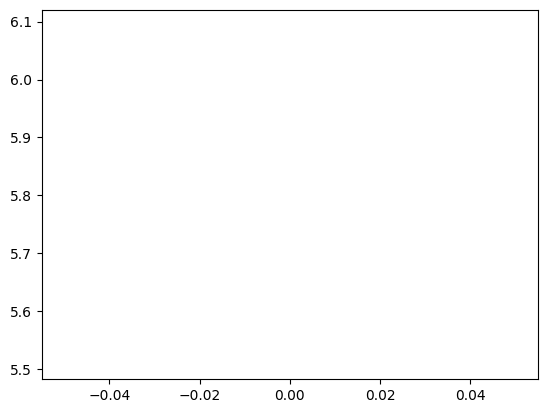

In [16]:
plt.plot(costs)

In [17]:
#Predict the data
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
    

In [18]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [26]:
# Merge functions into a model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialising(X_train.shape[0])

    #Finding out the gradiet descent derivates and parameters used by the model
    params, grads, cost = optimize(w, b, X_train, Y_train, num_iterations = 2000, learning_rate = 0.5, print_cost = False)

    w = params["w"]
    b = params["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    print("The accuracy for training data is %f" %(train_acc))
    print("The accuracy for testing data is %f" %(test_acc))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    
    

In [27]:
d = model(train_set_x_orig_flatten, train_set_y, test_set_x_orig_flatten, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

/var/folders/gh/q46wdj_d4yn287xfps_6030h0000gn/T/ipykernel_46360/899156948.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/var/folders/gh/q46wdj_d4yn287xfps_6030h0000gn/T/ipykernel_46360/522273761.py:10: RuntimeWarning: divide by zero encountered in log
  cost = -1 * np.sum(np.log(A)*Y + (1-Y)*np.log(1-A))/m
/var/folders/gh/q46wdj_d4yn287xfps_6030h0000gn/T/ipykernel_46360/522273761.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = -1 * np.sum(np.log(A)*Y + (1-Y)*np.log(1-A))/m


The accuracy for training data is 82.775120
The accuracy for testing data is 56.000000


TypeError: Selection can't process np.float64(1.0)

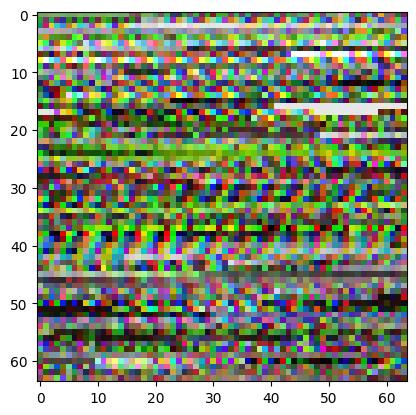

In [32]:
# Example of a picture that was wrongly classified.
index = 25
plt.imshow(test_set_x_orig_flatten[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")